In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint # Used to integrate differential equations
from scipy.optimize import fsolve  # Can be used to find the roots of a function
from mpl_toolkits.mplot3d import Axes3D # Necessary to generate 3d+ plots

In [2]:
#Made the following rounding function to find steady states. There is definetly an already build one, but could
# not find the correct one for what I want to do

def rounder(x,thresh,distance):
    if abs(thresh-x)<distance:
        output=thresh
    else:
        output=x
        
    return (output)
    
    
# You give with x the number you want to check and with result the number you want to see if it's approached.
#For steady-states, 'x' would be the value of the differential and result would be 0. Could be used in other ways.

Simple Model Version: No NTPs or T7 polymerase involved in the equations

In [3]:
#To visualize the equations and the species they represent see the figures.

def all_eq(var,t,k1,d1,k2,k_2,d2,k3,k_3,k4,k5,k_5,k6,k_6,k7,k8,k_8,k10,k100,d3,ratio):
    
    X=var[0]; Y=var[1]; A=var[2]; B=var[3]; C=var[4]; D=var[5]; E=var[6];
    F=var[7]; G=var[8]; H=var[9]; I=var[10]; J=var[11]; K=var[12]; L=var[13];
    M=var[14]; N=var[15]; O=var[16]; lP=var[17]; Q=var[18]; R=var[19]; pP=var[20]; Aptamer=var[21]
    Cpf1=var[22]
    
    #k1=par[0]; d1=par[1]; k2=par[2]; k_2=par[3]; d2=par[4]; k3=par[5]; k_3=par[6];
    #k4=par[7]; k5=par[8]; k_5=par[9]; k6=par[10]; k_6=par[11]; k7=par[12]; k8=par[13];
    #k_8=par[14]; k10=par[15]; k100=par[16]; d3=var=[17]; ratio=par[18]
    
    
    
    dX=k1/ratio+k_2*A-X*(d1+k2)   # The parameter ratio is used to simulate different ratios of plasmid1/plasmid2 later,
                                  # It should be set at 1 normally
    dY=k1+k_2*B-Y*(d1+k2)
    
    dA=k2*X*Cpf1+k_3*C+k_5*F+k_6*J+k_8*N+k4*(G+I+O+R)-A*(d2+k_2+k3*D+k5*E+k6*H+k8*L)
    
    dB=k2*Y*Cpf1+k_3*E+k_5*F+k_6*I+k_8*M+k4*(H+J+O+Q)-B*(d2+k_2+k3*D+k5*C+k6*G+k8*K)

    dC=k3*A*D+k_5*F-C*(k7+k_3+k5*B)
    
    dE=k3*B*D+k_5*F-E*(k7+k_3+k5*A)
    
    dD=k_3*(E+C)-k3*D*(A+B)
    
    dF=k5*(C*B+E*A)-2*k7*F
    
    dG=k7*C+k_6*I-G*(k4+k6*B)
    
    dH=k7*E+k_6*J-H*(k4+k6*A)
    
    dI=k6*G*B+k7*F-I*(k4+k7)
    
    dJ=k6*H*A+k7*F-J*(k4+k7)
    
    dK=k4*G+k_8*M-k8*K*B
    
    dL=k4*H+k_8*N-k8*L*A
    
    dM=k8*K*B+k4*I-M*(k_8+k7)
    
    dN=k8*L*A+k4*J-N*(k_8+k7)
    
    dO=k7*(I+J)-2*k4*O
    
    dQ=k7*M+k4*(O-Q)
    
    dR=k7*N+k4*(O-R)
    
    dlP=k7*(M+N+I+J)-k10*lP
    
    dpP=k10*lP
    
    dAptamer=k100*pP-d1*Aptamer
    
    dCpf1=k_2*(B+A)-Cpf1*(k2*(X+Y)+d3)
    
    
    return np.array([dX,dY,dA,dB,dC,dD,dE,dF,dG,dH,dI,dJ,dK,dL,dM,dN,dO,dlP,dQ,dR,dpP,dAptamer,dCpf1])
    
    

In [4]:
# To use odeint to solve the integrals, you need to provide: a function with the equations, initial conditions of the variables,
# initial conditions for the parameters, a range of "time" units
time=np.arange(0,500)
variables=[0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10]
ratio=1
parameters=(1,0.05,1,0.05,0.05,1,0.05,0.01,1,0.05,1,0.05,1,1,0.05,1,1,0.05,ratio)

In [5]:
results=odeint(all_eq,variables,time,parameters)
#The results of the integrations are saved in an numpy array(results here)
#Keep in mind each sub-array in results represents all the variables at a time unit and NOT one of the variables through time

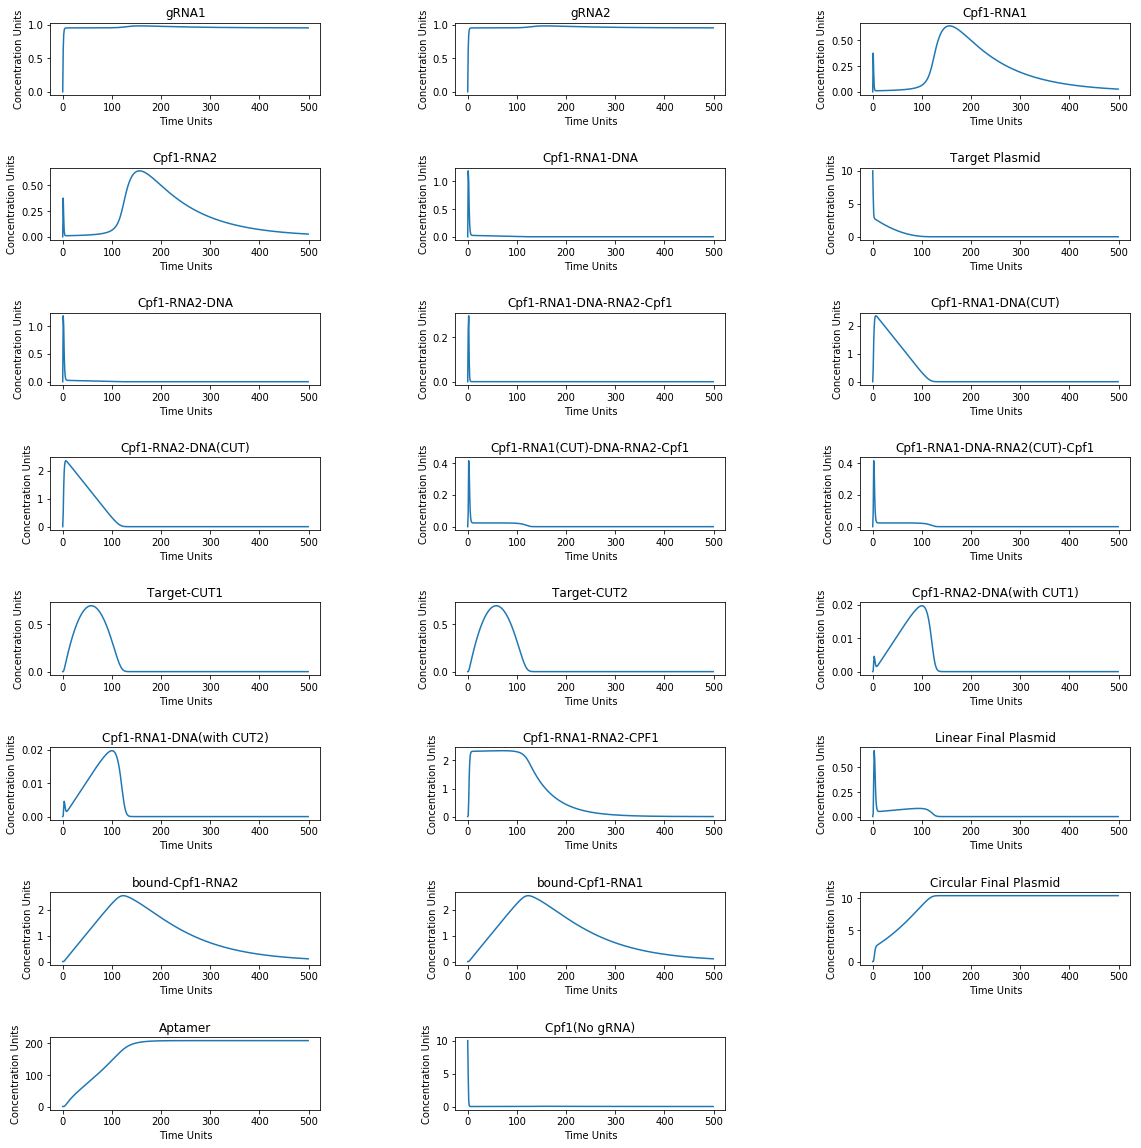

In [6]:
titles=['gRNA1','gRNA2','Cpf1-RNA1','Cpf1-RNA2','Cpf1-RNA1-DNA','Target Plasmid','Cpf1-RNA2-DNA','Cpf1-RNA1-DNA-RNA2-Cpf1',
       'Cpf1-RNA1-DNA(CUT)','Cpf1-RNA2-DNA(CUT)','Cpf1-RNA1(CUT)-DNA-RNA2-Cpf1','Cpf1-RNA1-DNA-RNA2(CUT)-Cpf1',
       'Target-CUT1','Target-CUT2','Cpf1-RNA2-DNA(with CUT1)','Cpf1-RNA1-DNA(with CUT2)','Cpf1-RNA1-RNA2-CPF1',
       'Linear Final Plasmid','bound-Cpf1-RNA2','bound-Cpf1-RNA1','Circular Final Plasmid','Aptamer','Cpf1(No gRNA)']
plt.figure(figsize=(15,20))
for i in range(len(variables)):
    plt.subplot(8,3,i+1)
    plt.plot(time,results[:,i])
    plt.xlabel('Time Units')
    plt.ylabel('Concentration Units')
    plt.title(titles[i])
plt.subplots_adjust(left= 0, right=1, wspace=0.5, hspace=1)
plt.show()


#Below are the results of the integrations for all species.

In [7]:
## Having solved the integrals, we can use these results with the function with the differentials to solve the
# derivatives themselves.

diff_results=[]
for i in range(len(time)):
    diff_results.append(all_eq(results[i],time,*(parameters)))
    
diff_results=np.asarray(diff_results) # Transform the list into an numpy array (easier to plot)

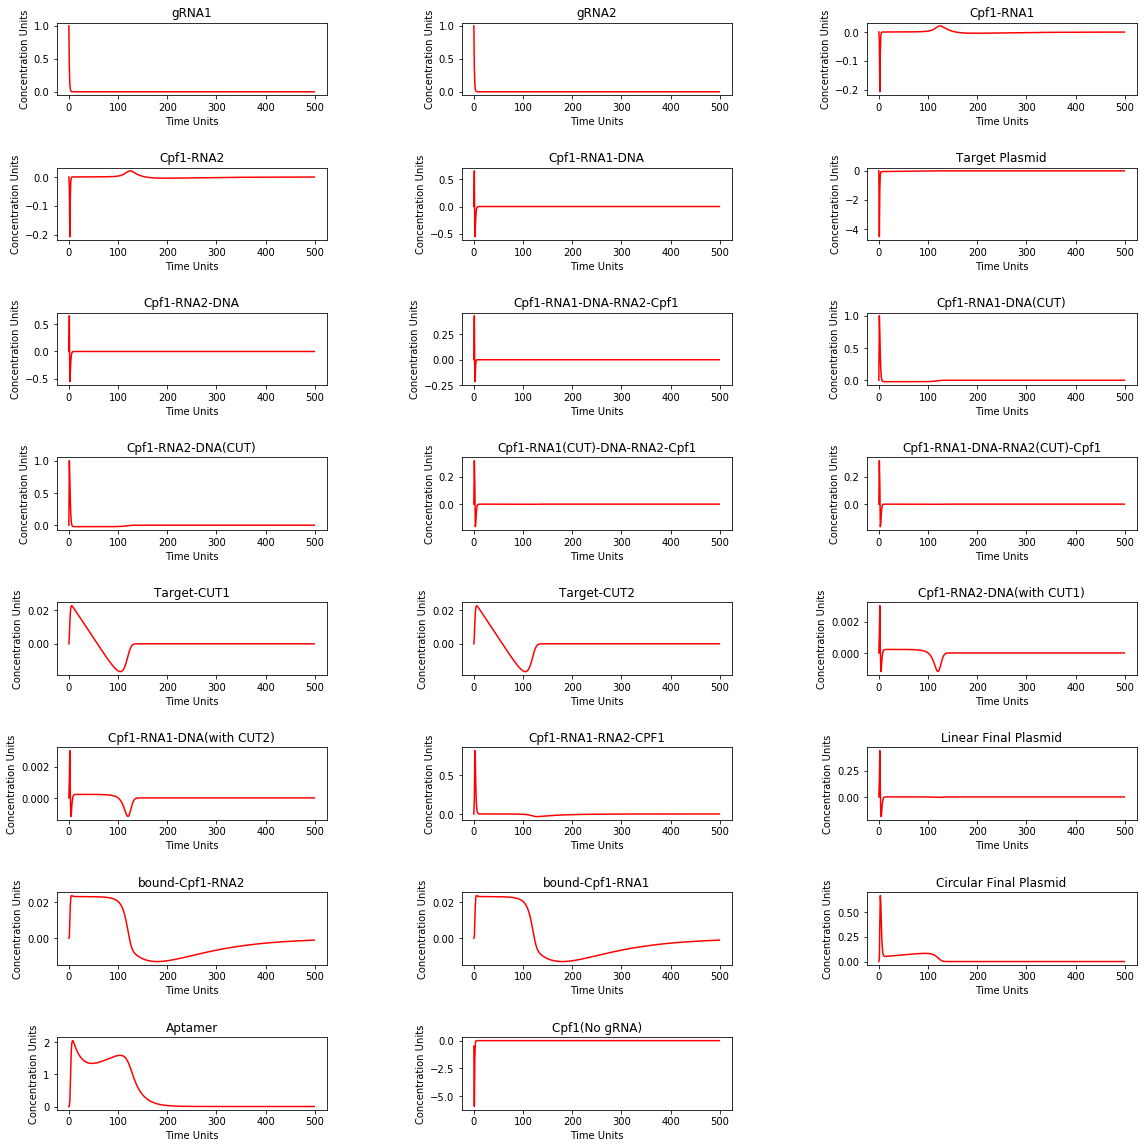

In [8]:
titles=['gRNA1','gRNA2','Cpf1-RNA1','Cpf1-RNA2','Cpf1-RNA1-DNA','Target Plasmid','Cpf1-RNA2-DNA','Cpf1-RNA1-DNA-RNA2-Cpf1',
       'Cpf1-RNA1-DNA(CUT)','Cpf1-RNA2-DNA(CUT)','Cpf1-RNA1(CUT)-DNA-RNA2-Cpf1','Cpf1-RNA1-DNA-RNA2(CUT)-Cpf1',
       'Target-CUT1','Target-CUT2','Cpf1-RNA2-DNA(with CUT1)','Cpf1-RNA1-DNA(with CUT2)','Cpf1-RNA1-RNA2-CPF1',
       'Linear Final Plasmid','bound-Cpf1-RNA2','bound-Cpf1-RNA1','Circular Final Plasmid','Aptamer','Cpf1(No gRNA)']
plt.figure(figsize=(15,20))
for i in range(len(variables)):
    plt.subplot(8,3,i+1)
    plt.plot(time,diff_results[:,i],'r')
    plt.xlabel('Time Units')
    plt.ylabel('Concentration Units')
    plt.title(titles[i])
plt.subplots_adjust(left= 0, right=1, wspace=0.5, hspace=1)
plt.show()

Full Version of the Model: NTP concentration and T7 polymerase included

In [9]:
def T7_eqs_NTPS(var,t,k1,d1,k2,k_2,d2,k3,k_3,k4,k5,k_5,k6,k_6,k7,k8,k_8,k10,k100,d3,k0,k_0,kntp):
    
    X=var[0]; Y=var[1]; A=var[2]; B=var[3]; C=var[4]; D=var[5]; E=var[6];
    F=var[7]; G=var[8]; H=var[9]; I=var[10]; J=var[11]; K=var[12]; L=var[13];  
    M=var[14]; N=var[15]; O=var[16]; lP=var[17]; Q=var[18]; R=var[19]; pP=var[20]; Aptamer=var[21]
    Cpf1=var[22]; pl1=var[23] ; pl2=var[24]; T7=var[25]; pl1_T7=var[26] ; pl2_T7=var[27] ; pP_T7=var[28]
    NTP=var[29]
    
    #k1=par[0]; d1=par[1]; k2=par[2]; k_2=par[3]; d2=par[4]; k3=par[5]; k_3=par[6];
    #k4=par[7]; k5=par[8]; k_5=par[9]; k6=par[10]; k_6=par[11]; k7=par[12]; k8=par[13];
    #k_8=par[14]; k10=par[15]; k100=par[16]; d3=var=[17];
    
    
    S=1/(1+np.e**(-NTP+30)) # S is the activity function of the T7 polymerase. It's a sigmoid function depending
                            # on the concentration of NTPs. Parameter 30 is the treshold of inactivation.
    
    dNTP=-S*(pl1_T7+pl2_T7+pP_T7)*kntp
    
    dpl1=pl1_T7*k_0-pl1*T7*k0
    
    dpl2=pl2_T7*k_0-pl2*T7*k0
    
    dT7=(pl1_T7+pl2_T7+pP_T7)*k_0-T7*k0*(pl1+pl2+pP)
    
    dpl1_T7=pl1*T7*k0-pl1_T7*k_0
    
    dpl2_T7=pl2*T7*k0-pl2_T7*k_0
    
    dX=pl1_T7*k1*S+k_2*A-X*(d1+k2)  
                                
    dY=pl2_T7*k1*S+k_2*B-Y*(d1+k2)
    
    dA=k2*X*Cpf1+k_3*C+k_5*F+k_6*J+k_8*N+k4*(G+I+O+R)-A*(d2+k_2+k3*D+k5*E+k6*H+k8*L)
    
    dB=k2*Y*Cpf1+k_3*E+k_5*F+k_6*I+k_8*M+k4*(H+J+O+Q)-B*(d2+k_2+k3*D+k5*C+k6*G+k8*K)
    
    dC=k3*A*D+k_5*F-C*(k7+k_3+k5*B)
    
    dE=k3*B*D+k_5*F-E*(k7+k_3+k5*A)
    
    dD=k_3*(E+C)-k3*D*(A+B)
    
    dF=k5*(C*B+E*A)-2*k7*F
    
    dG=k7*C+k_6*I-G*(k4+k6*B)
    
    dH=k7*E+k_6*J-H*(k4+k6*A)
    
    dI=k6*G*B+k7*F-I*(k4+k7)
    
    dJ=k6*H*A+k7*F-J*(k4+k7)
    
    dK=k4*G+k_8*M-k8*K*B
    
    dL=k4*H+k_8*N-k8*L*A
    
    dM=k8*K*B+k4*I-M*(k_8+k7)
    
    dN=k8*L*A+k4*J-N*(k_8+k7)
    
    dO=k7*(I+J)-2*k4*O
    
    dQ=k7*M+k4*(O-Q)
    
    dR=k7*N+k4*(O-R)
    
    dlP=k7*(M+N+I+J)-k10*lP
    
    dpP=k10*lP-T7*pP*k0+pP_T7*k_0
    
    dpP_T7=T7*k0*pP-pP_T7*k_0
    
    dAptamer=k100*pP_T7*S-d1*Aptamer
    
    dCpf1=k_2*(B+A)-Cpf1*(k2*(X+Y)+d3)
    
    return np.array([dX,dY,dA,dB,dC,dD,dE,dF,dG,dH,dI,dJ,dK,dL,dM,dN,dO,dlP,dQ,dR,
                     dpP,dAptamer,dCpf1,dpl1,dpl2,dT7,dpl1_T7,dpl2_T7,dpP_T7,dNTP])

In [62]:
time=np.arange(0,1000)
variables_3=[0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,10,10,40,0,0,0,100]
parameters_3=(1,0.05,1,0.05,0.05,1,0.05,0.01,1,0.05,1,0.05,1,1,0.05,1,1,0.05,1,0.05,0.01)

In [63]:
results_3=odeint(T7_eqs_NTPS,variables_3,time,parameters_3)

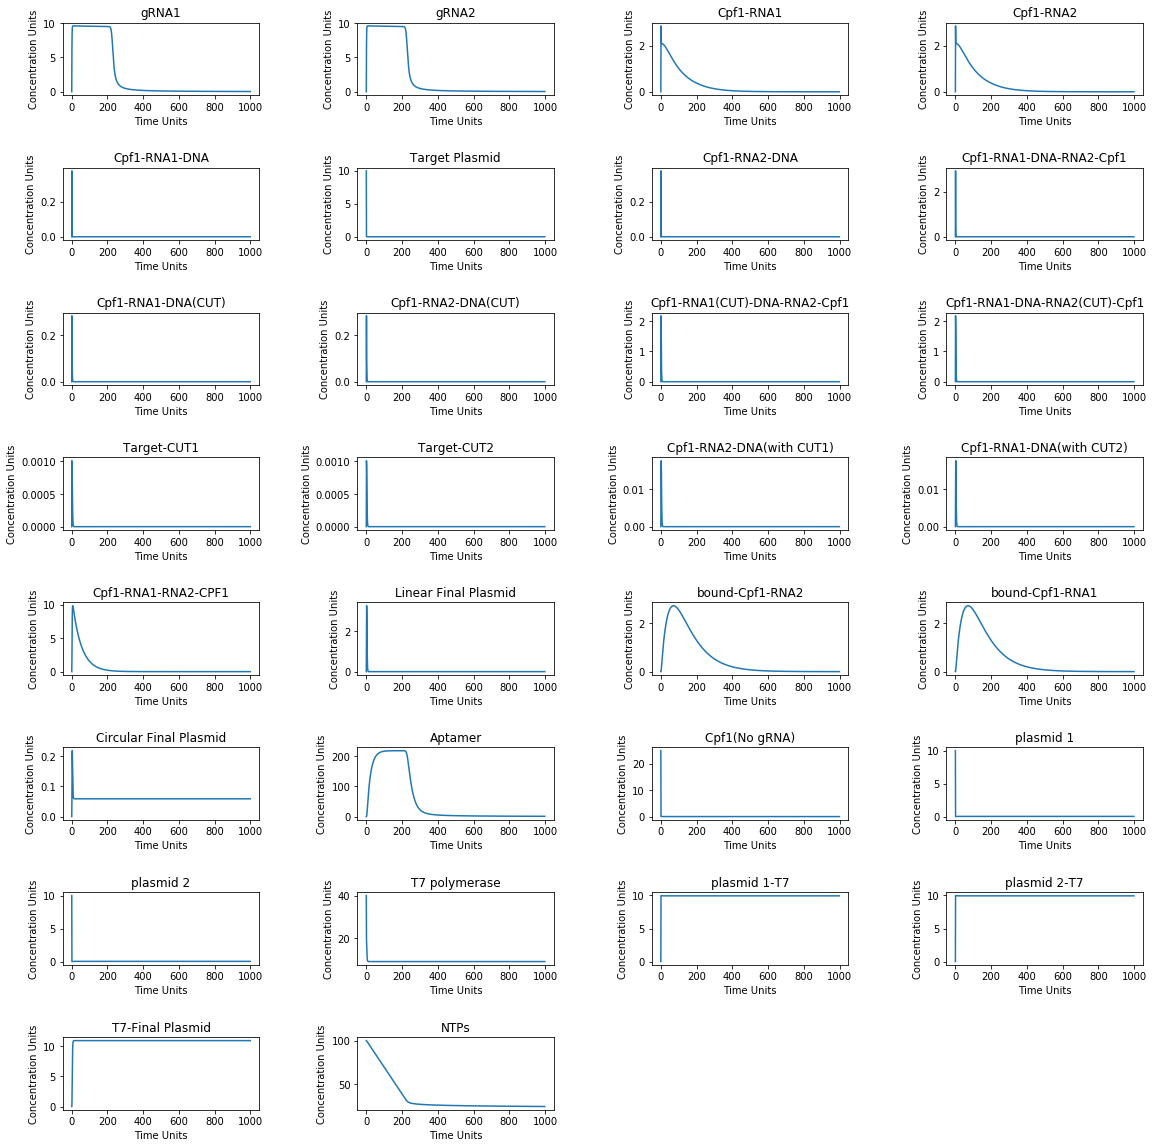

In [64]:
titles=['gRNA1','gRNA2','Cpf1-RNA1','Cpf1-RNA2','Cpf1-RNA1-DNA','Target Plasmid','Cpf1-RNA2-DNA',
        'Cpf1-RNA1-DNA-RNA2-Cpf1','Cpf1-RNA1-DNA(CUT)','Cpf1-RNA2-DNA(CUT)','Cpf1-RNA1(CUT)-DNA-RNA2-Cpf1',
        'Cpf1-RNA1-DNA-RNA2(CUT)-Cpf1','Target-CUT1','Target-CUT2','Cpf1-RNA2-DNA(with CUT1)','Cpf1-RNA1-DNA(with CUT2)',
        'Cpf1-RNA1-RNA2-CPF1','Linear Final Plasmid','bound-Cpf1-RNA2','bound-Cpf1-RNA1','Circular Final Plasmid',
        'Aptamer','Cpf1(No gRNA)','plasmid 1','plasmid 2','T7 polymerase','plasmid 1-T7','plasmid 2-T7','T7-Final Plasmid',
        'NTPs']
plt.figure(figsize=(15,20))
for i in range(len(variables_3)):
    plt.subplot(8,4,i+1)
    plt.plot(time,results_3[:,i])
    plt.xlabel('Time Units')
    plt.ylabel('Concentration Units')
    plt.title(titles[i])
plt.subplots_adjust(left= 0, right=1, wspace=0.5, hspace=1)
plt.show()

In [13]:
diff_results_3=[]
for i in range(len(time)):
    diff_results_3.append(T7_eqs_NTPS(results_3[i],time,*(parameters_3)))
    
diff_results_3=np.asarray(diff_results_3)

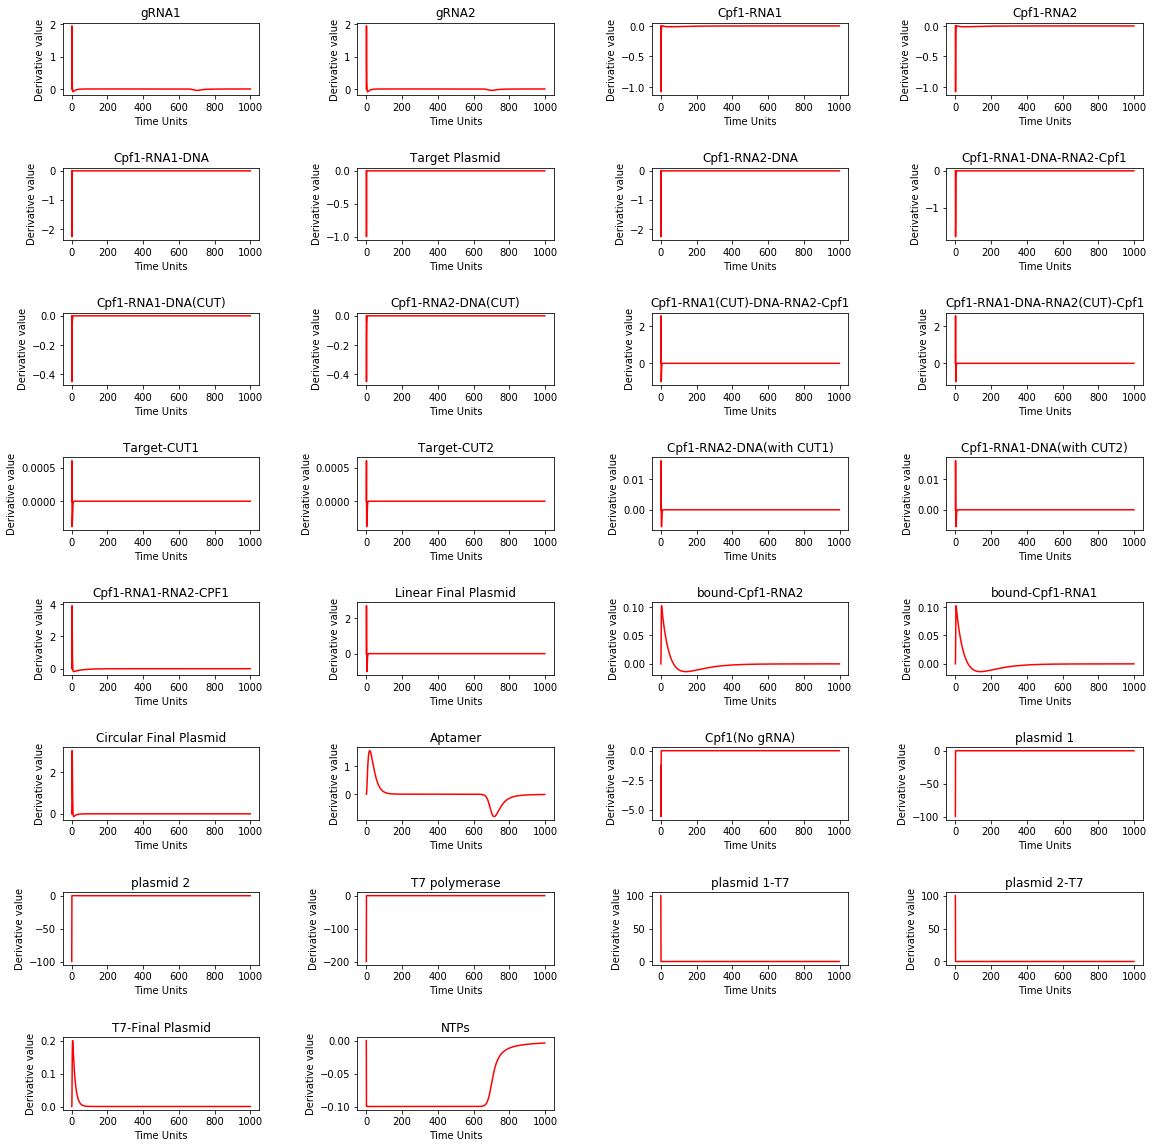

In [14]:
titles=['gRNA1','gRNA2','Cpf1-RNA1','Cpf1-RNA2','Cpf1-RNA1-DNA','Target Plasmid','Cpf1-RNA2-DNA',
        'Cpf1-RNA1-DNA-RNA2-Cpf1','Cpf1-RNA1-DNA(CUT)','Cpf1-RNA2-DNA(CUT)','Cpf1-RNA1(CUT)-DNA-RNA2-Cpf1',
        'Cpf1-RNA1-DNA-RNA2(CUT)-Cpf1','Target-CUT1','Target-CUT2','Cpf1-RNA2-DNA(with CUT1)','Cpf1-RNA1-DNA(with CUT2)',
        'Cpf1-RNA1-RNA2-CPF1','Linear Final Plasmid','bound-Cpf1-RNA2','bound-Cpf1-RNA1','Circular Final Plasmid',
        'Aptamer','Cpf1(No gRNA)','plasmid 1','plasmid 2','T7 polymerase','plasmid 1-T7','plasmid 2-T7','T7-Final Plasmid',
        'NTPs']
plt.figure(figsize=(15,20))
for i in range(len(variables_3)):
    plt.subplot(8,4,i+1)
    plt.plot(time,diff_results_3[:,i],color='r')
    plt.xlabel('Time Units')
    plt.ylabel('Derivative value')
    plt.title(titles[i])
plt.subplots_adjust(left= 0, right=1, wspace=0.5, hspace=1)
plt.show()

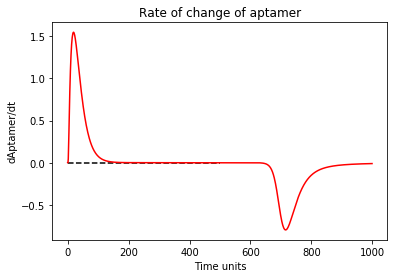

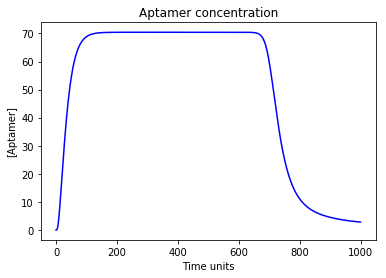

In [15]:
plt.plot(time,diff_results_3[:,-9],'r')
plt.title('Rate of change of aptamer')
plt.hlines(0,0,500,linestyle='dashed')
plt.ylabel ('dAptamer/dt')
plt.xlabel('Time units')
plt.show()
plt.plot(time,results_3[:,-9],'b')
plt.title('Aptamer concentration')
plt.ylabel('[Aptamer]')
plt.xlabel('Time units')
plt.show()

In [16]:
# Next, we investigate how different plasmid ratios affect the output of the model (production of aptamer)

In [17]:
#Extracting aptamer values for different plasmid ratios

#For the Simple Model:

ratio_values=np.arange(1,11)
time_checks=np.arange(50,850,50) #In these timepoints the aptamer concentration is checked
aptamer_values=np.zeros((len(ratio_values),len(time_checks)))

for i in range(len(ratio_values)):
    ratio=ratio_values[i]
    parameters=(1,0.05,1,0.05,0.05,1,0.05,0.01,1,0.05,1,0.05,1,1,0.05,1,1,0.05,ratio)
    results=odeint(all_eq,variables,time,parameters)
    
    for j in range(len(time_checks)):
        aptamer_values[i][j]=results[:,-2][time_checks[j]-1]
        
        
#For the Full Model (T7=10nM):

plasmid_2_values=np.arange(1,11)
plasmid_2_values=plasmid_2_values[::-1]
aptamer_values_2=np.zeros((len(ratio_values),len(time_checks)))
variables_3[-5]=10

for i in range(len(plasmid_2_values)):
    variables_3[-6]=plasmid_2_values[i]
    results_3=odeint(T7_eqs_NTPS,variables_3,time,parameters_3)

    for j in range(len(time_checks)):
        aptamer_values_2[i][j]=results_3[:,-9][time_checks[j]-2]
    
#For the Full Model (T7=30nM):

plasmid_2_values=np.arange(1,11)
plasmid_2_values=plasmid_2_values[::-1]
aptamer_values_3=np.zeros((len(ratio_values),len(time_checks)))
variables_3[-5]=30

for i in range(len(plasmid_2_values)):
    variables_3[-6]=plasmid_2_values[i]
    results_3=odeint(T7_eqs_NTPS,variables_3,time,parameters_3)

    for j in range(len(time_checks)):
        aptamer_values_3[i][j]=results_3[:,-9][time_checks[j]-2]

In [18]:
import seaborn as sn

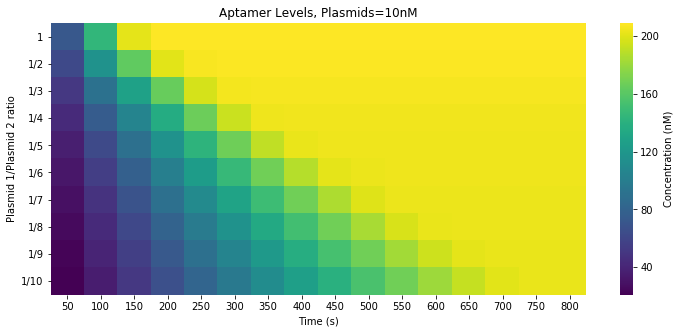

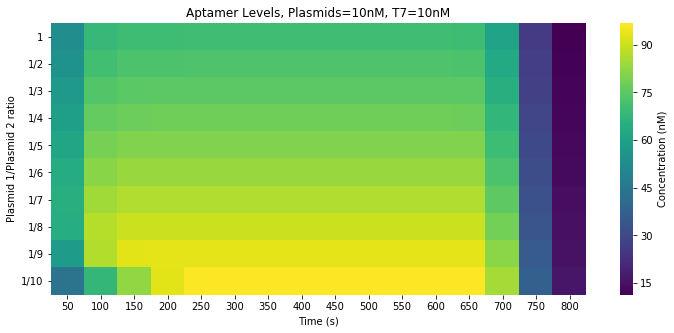

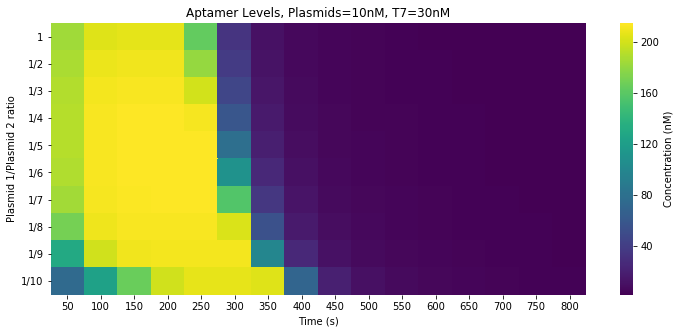

In [20]:
actual_ratios=['1','1/2','1/3','1/4','1/5','1/6','1/7','1/8','1/9','1/10']

plt.figure(figsize=(12,5))
sn.heatmap(aptamer_values, xticklabels=time_checks, yticklabels=actual_ratios,cmap='viridis', cbar_kws={'label': 'Concentration (nM)'})
plt.yticks(rotation=0) 
plt.ylabel('Plasmid 1/Plasmid 2 ratio')
plt.xlabel('Time (s)')
plt.title('Aptamer Levels, Plasmids=10nM')
plt.show()

plt.figure(figsize=(12,5))
sn.heatmap(aptamer_values_2, xticklabels=time_checks, yticklabels=actual_ratios,cmap='viridis',cbar_kws={'label': 'Concentration (nM)'})
plt.yticks(rotation=0) 
plt.ylabel('Plasmid 1/Plasmid 2 ratio')
plt.xlabel('Time (s)')
plt.title('Aptamer Levels, Plasmids=10nM, T7=10nM')
plt.show()

plt.figure(figsize=(12,5))
sn.heatmap(aptamer_values_3, xticklabels=time_checks, yticklabels=actual_ratios,cmap='viridis', cbar_kws={'label': 'Concentration (nM)'})
plt.yticks(rotation=0) 
plt.ylabel('Plasmid 1/Plasmid 2 ratio')
plt.xlabel('Time (s)')
plt.title('Aptamer Levels, Plasmids=10nM, T7=30nM')
plt.show()

#You can change the font size with the following command: matplotlib.rcParams.update({'font.size': "input size"})


In [21]:
## Next, only equimolar concentration of T7 polymerase with the sum of all available plasmids is used
# The operation of the model is assessed by observing the aptamer concentration once max value/steady state (see dissertation)
# is reached, and the time required to reach that point. How does having overabundance or not of NTPs affect the system?

In [65]:
variables_3=[0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,10,10,10,0,0,0,100]

variables_3[-5]=variables_3[-6]+variables_3[-7]+variables_3[5] #T7=plasmid1+plasmid2+target_plasmid

#Extracting the steady state times and aptamer values NTP=100nM
variables_3[-1]=100
plasmid_values=np.arange(20,100,5)
enzyme_values=np.arange(20,100,5)
# These ranges are used to avoid problems with the time range.For a broader value range one should use a larger time range

st_st=np.zeros((len(plasmid_values),len(enzyme_values)))
st_st_values=np.zeros((len(plasmid_values),len(enzyme_values)))
for i in range(len(plasmid_values)):
    for j in range(len(enzyme_values)):
        variables_3[5]=plasmid_values[i]
        variables_3[22]=enzyme_values[j]
        results_3=odeint(T7_eqs_NTPS,variables_3,time,parameters_3)
        
        diff_results_3=[]
        for l in range(len(time)):
            diff_results_3.append(T7_eqs_NTPS(results_3[l],time,*(parameters_3)))
        diff_results_3=np.asarray(diff_results_3)
        
        #The next loop goes through the aptamer concenctrations untill it finds when it reaches zero,
        # saving both time and concentration.
        
        for k in range(len(time)):
            if k+1==time[-1]:
                st_st[j][i]=6000
                st_st_values[j][i]=0
                break
            elif (rounder(diff_results_3[:,-9][k],0,0.01)==0 and k>10) or ((diff_results_3[:,-9][k])>0 and (diff_results_3[:,-9][k+1])<0):
                st_st[j][i]=k
                st_st_values[j][i]=results_3[:,-9][k]
                break
                
                
#Extracting the steady state times and aptamer values NTP=1000nM
variables_3[-1]=1000

st_st_3=np.zeros((len(plasmid_values),len(enzyme_values)))
st_st_values_3=np.zeros((len(plasmid_values),len(enzyme_values)))
for i in range(len(plasmid_values)):
    for j in range(len(enzyme_values)):
        variables_3[5]=plasmid_values[i]
        variables_3[22]=enzyme_values[j]
        results_3=odeint(T7_eqs_NTPS,variables_3,time,parameters_3)
        
        diff_results_3=[]
        for l in range(len(time)):
            diff_results_3.append(T7_eqs_NTPS(results_3[l],time,*(parameters_3)))
        diff_results_3=np.asarray(diff_results_3)
        
        for k in range(len(time)):
            if k+1==time[-1]:
                st_st_3[j][i]=6000
                st_st_values_3[j][i]=0
                break
            elif (rounder(diff_results_3[:,-9][k],0,0.01)==0 and k>10) or ((diff_results_3[:,-9][k])>0 and (diff_results_3[:,-9][k+1])<0):
                st_st_3[j][i]=k
                st_st_values_3[j][i]=results_3[:,-9][k]
                break

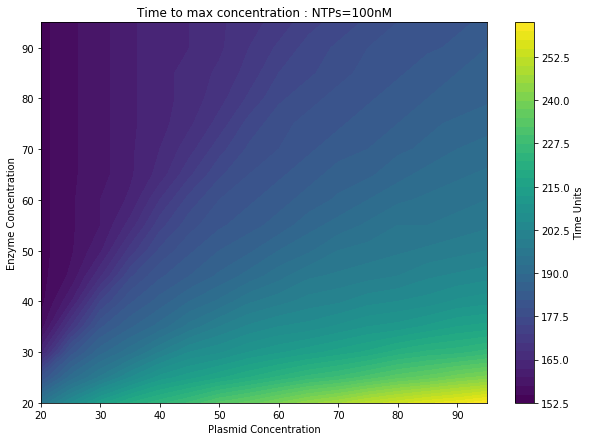

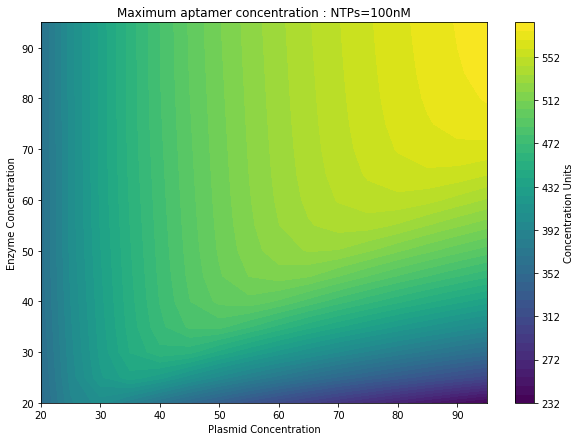

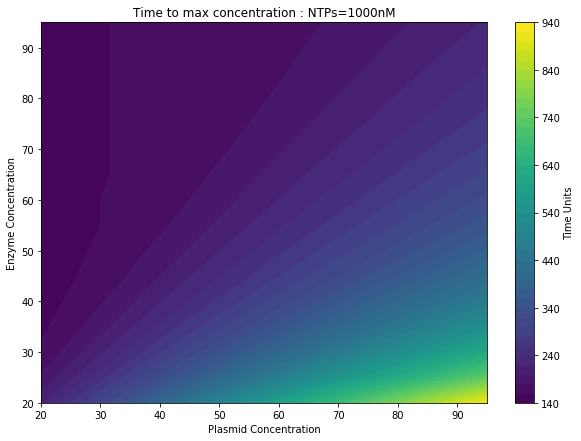

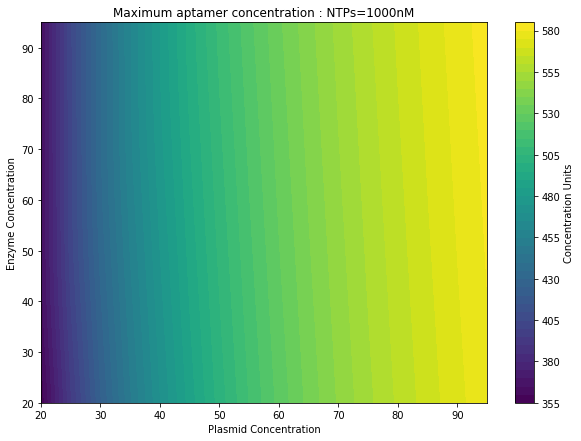

In [69]:
plt.figure(figsize=(10,7))
plt.contourf(plasmid_values,enzyme_values,st_st,50)
plt.xlabel('Plasmid Concentration')
plt.ylabel('Enzyme Concentration')
plt.title('Time to max concentration : NTPs=100nM')
ccc1=plt.colorbar()
ccc1.set_label('Time Units')
plt.show()

plt.figure(figsize=(10,7))
plt.contourf(plasmid_values,enzyme_values,st_st_values,50)
plt.xlabel('Plasmid Concentration')
plt.ylabel('Enzyme Concentration')
plt.title('Maximum aptamer concentration : NTPs=100nM')
cc2=plt.colorbar()
cc2.set_label('Concentration Units')
plt.show()

plt.figure(figsize=(10,7))
plt.contourf(plasmid_values,enzyme_values,st_st_3,50)
plt.xlabel('Plasmid Concentration')
plt.ylabel('Enzyme Concentration')
plt.title('Time to max concentration : NTPs=1000nM')
ccc1=plt.colorbar()
ccc1.set_label('Time Units')
plt.show()

plt.figure(figsize=(10,7))
plt.contourf(plasmid_values,enzyme_values,st_st_values_3,50)
plt.xlabel('Plasmid Concentration')
plt.ylabel('Enzyme Concentration')
plt.title('Maximum aptamer concentration : NTPs=1000nM')
cc2=plt.colorbar()
cc2.set_label('Concentration Units')
plt.show()

In [40]:
#### There are 5 essential variables in the model (1.Cpf1 enzyme, 2.Target plasmid, 3.gRNA plasmids, 4.NTP concentration,
#### 5.T7 polymerase concentration) that can affect performance.

#We can try to visualise a greater number of variables with 4d plots in 3d space.
#Scatterplots are used here. Alternatively, 3d heatmaps can be used if specific x,y,z are decided.



In [1]:
# 4d Random sampling scatter plot. (Not that effective)


plasmid_values_3d=np.random.uniform(20,50,100)
enzyme_values_3d=np.random.uniform(20,50,100)
T7_values_3d=np.random.uniform(20,50,100)


steady3d=[]
aptamer3d=[]


for i in range(len(plasmid_values_3d)):
    variables_3[5]=plasmid_values_3d[i]
    variables_3[22]=enzyme_values_3d[i]
    variables_3[-5]=T7_values_3d[i]
    results_3=odeint(T7_eqs_NTPS,variables_3,time,parameters_3)

    diff_results_3=[]
    for l in range(len(time)):
        diff_results_3.append(T7_eqs_NTPS(results_3[l],time,*(parameters_3)))
    diff_results_3=np.asarray(diff_results_3)

    for k in range(len(time)):
        if k+1==time[-1]:
            steady3d.append(600)
            aptamer3d.append(0)
            break
        elif (rounder(diff_results_3[:,-9][k],0,0.01)==0 and k>10) or ((diff_results_3[:,-9][k])>0 and (diff_results_3[:,-9][k+1])<0):
            steady3d.append(k)
            aptamer3d.append(results_3[:,-9][k])
            break


NameError: name 'np' is not defined

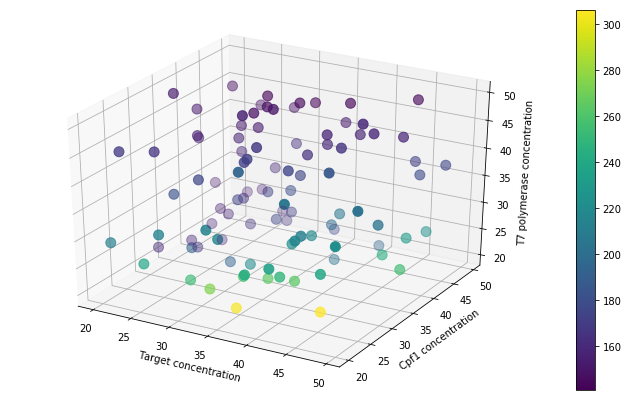

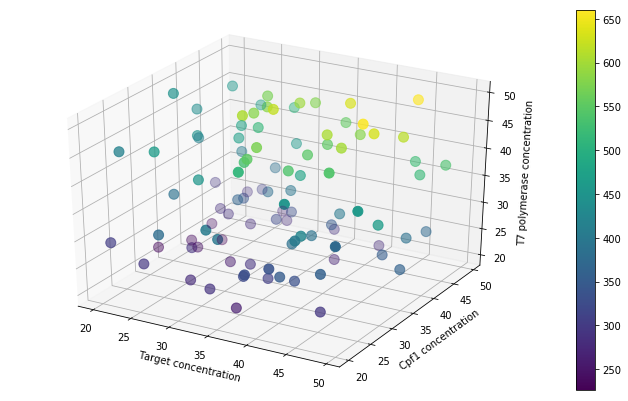

In [42]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')


sp = ax.scatter(plasmid_values_3d,enzyme_values_3d,T7_values_3d, s=100,c=steady3d)
plt.xlabel('Target concentration')
plt.ylabel('Cpf1 concentration')
ax.set_zlabel('T7 polymerase concentration')
plt.title('')
plt.colorbar(sp)
plt.show()

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')

sp1 = ax.scatter(plasmid_values_3d,enzyme_values_3d,T7_values_3d, s=100,c=aptamer3d)
plt.xlabel('Target concentration')
plt.ylabel('Cpf1 concentration')
ax.set_zlabel('T7 polymerase concentration')
plt.title('')
plt.colorbar(sp1)
plt.show()

In [84]:
#4d scatterplots sampling a whole range of parameters:



#The following function creates appropriate arrays of parameter values to be fed in the equation function.

def generator_for_4d(one,two,three,steps,cmin,increment):

    c3=cmin
    for i in range(steps):
        c2=cmin
        for j in range(steps):
            c1=cmin
            for k in range(steps):
                one.append(c1)
                two.append(c2)
                three.append(c3)
                c1+=increment
            c2+=increment
        c3+=increment


#cmin: the initial concentration
#increment:the increment added in every step
#steps:the number of values to be added in the array
# Make sure to feed it empty arrays, cause it appends values and could cause size problems            

In [85]:
p_v_3d=[]
c_v_3d=[]
e_v_3d=[]

generator_for_4d(p_v_3d,c_v_3d,e_v_3d,6,20,5)

#The code right now will use T7 polymerase as the z variable. To use the NTPs multiply the third array: e_v_3d=e_v_3d*10
# And in the next cell change: variables_3[-5] to variables_3[-1]


In [86]:
steady3d=[]
aptamer3d=[]

for i in range(len(p_v_3d)):
    variables_3[5]=p_v_3d[i]
    variables_3[22]=c_v_3d[i]
    variables_3[-5]=e_v_3d[i]
    results_3=odeint(T7_eqs_NTPS,variables_3,time,parameters_3)

    diff_results_3=[]
    for l in range(len(time)):
        diff_results_3.append(T7_eqs_NTPS(results_3[l],time,*(parameters_3)))
    diff_results_3=np.asarray(diff_results_3)

    for k in range(len(time)):
        if k+1==time[-1]:
            steady3d.append(600)
            aptamer3d.append(0)
            break
        elif (rounder(diff_results_3[:,-9][k],0,0.01)==0 and k>10) or ((diff_results_3[:,-9][k])>0 and (diff_results_3[:,-9][k+1])<0):
            steady3d.append(k)
            aptamer3d.append(results_3[:,-9][k])
            break

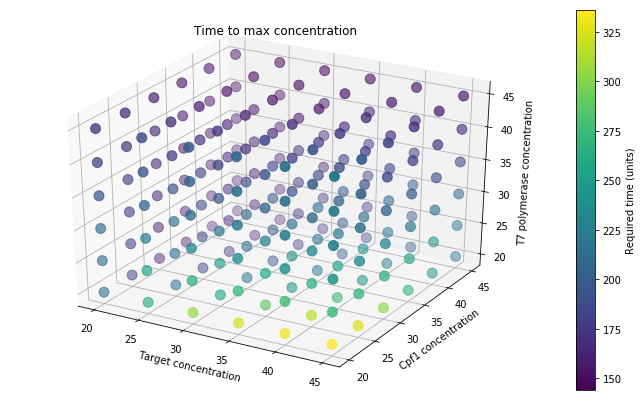

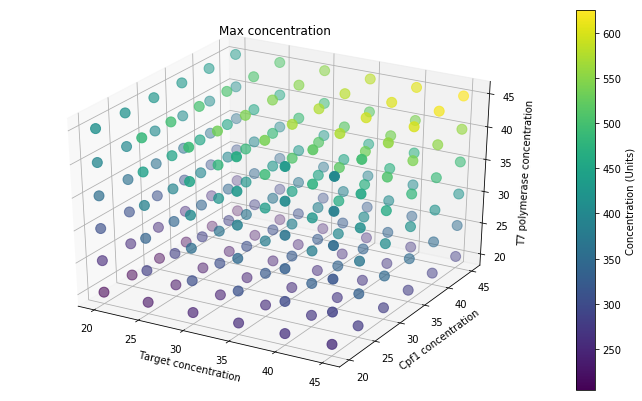

In [87]:
fig=plt.figure(figsize=(12,7))
ax=fig.add_subplot(111, projection='3d')


sp1=ax.scatter(p_v_3d,c_v_3d,e_v_3d, s=100,c=steady3d)
plt.xlabel('Target concentration')
plt.ylabel('Cpf1 concentration')
ax.set_zlabel('T7 polymerase concentration')
plt.title('Time to max concentration')
cbar1=plt.colorbar(sp1)
cbar1.set_label('Required time (units)')
plt.show()

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')

sp2 = ax.scatter(p_v_3d,c_v_3d,e_v_3d, s=100,c=aptamer3d)
plt.xlabel('Target concentration')
plt.ylabel('Cpf1 concentration')
ax.set_zlabel('T7 polymerase concentration')
plt.title('Max concentration')
cbar2=plt.colorbar(sp2)
cbar2.set_label('Concentration (Units)')
plt.show()